## Programming for Data Analysis Project Submission 2018

### Foreword
The investigation and synthesis of data contained in this Jupyter Notebook is the project submission for the 2nd semester 10 credit module - **Programming for Data Analysis**, part of the course entitled *Higher Diploma in Science - Computing(Data Analytics)*, submitted to Dr. Ian McLoughlin, Lecturer and Programme Director at GMIT.

Submitted by Justin Rutherford<br>
December 2018.

### Project Requirements;

***Extract from the Problem Statement;***<br>
*"Choose a real-world phenomenon that can be measured and for which you could collect at least one-hundred data points across at least four different variables.*<br>
*1. Investigate the types of variables involved, their likely distributions, and their relationships with each other.*<br>
*2. Synthesise/simulate a data set as closely matching their properties as possible.*<br>
*3. Detail your research and implement the simulation in a Jupyter notebook – the data set itself can simply be displayed in an output cell within the notebook".*



### Work Plan

1. Decide on the real world phenomenon to be simulated and access a publically available dataset. 
2. Review the dataset and extract the relevant data for further investigation.
3. Establish a **baseline** set of parameters for which we will then simulate data relecting closely the statistics of the real data.
4. Conduct on-line research to establish the various probability distributions used to simulate similar datasets.
5. Using an appropriate/equivalent Numpy Random distribution function we will then simulate datasets based on the statistics obtained.
6. We will then summarise and provide commentary and comparative analysis of findings from both real and simulated datasets. 

### Summary Results and Commentary



For the purpose of establishing a baseline dataset with which to compare our simulated dataset we have selected to use meteorological data recorded at the Teagasc crop research facility in Oakpark, Co. Carlow.
![Teagasc](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSQmtLTH5qLB4--K9dLvIOwcaNWJm5fMnxqG8jqYNA7DCUfbRoG)
The recorded data at this location is primarily used for resarch puposes as inputs in studying plant geonomics with the aim of increasing plant growth & productivity.  The dataset available for this paper is of very good quality.  For interest we inlcude an image of the Oakpark Meteorological Station below; ![Met Station](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSubFO2yv2Xq-5AcctbWpa3jBHGAWvRRVnJETUL22Cy1dY0R3Y6)

We have chosen the following 5 meteorological variables in order to establish a reference dataset with the intent of synthesising another dataset using standard probability distributions with numeric random number generators;
*Windpeed, Wind Direction, Rainfall, Soil Temperature, and Solar Radiation.*

We built a dataframe for one complete calendar year (2017) using daily Oakpark meteorological recordings downloaded as a csv file.  We applied statistical analysis to give us the following real baseline or reference dataset with which to compare our synthetic data;
![Ref_data](Images\Ref_data.gif)


It has been interesting to discover the difficulty in simulating or replicating values of this natural, chaotic phenomenon that is weather.  Although we have been able to simulate data that falls within the same max/min range with similar descriptive statistics (mean, standard deviation etc) and in some cases very similar histogram plots, it is only when we have plotted alternative graphics that we observe the shortcomings in our simulated dataset.  In many ways it resembles the observations of statistician Francis Anscombe when he demonstrated the importance of graphing data before it was analysed and the fallacy of the widely held assumption among his peers that data was exact and graphs were rough!

At this juncture it is also important to state our expected shortcomings in this report.  We have attempted to find the best or most appropriate probability distributions, having researched and referenced links using limited internet searches exclusively.  We have tried to fit the probability distribution to the real data as best we can given the constraints of this exercise, however we have not exhausted all the available distributions that may be available or more applicable beyond the Numpy Random package.  We also noted, from reading various academic papers, that this difficulty seems to be pervasive, and a deeping of our understanding in this area is required.

To start we will look at **wind speed** and **wind direction**.  We simulated wind speed data with almost identical statistics to the real dataset and plotted it using a histogram.  We used a Weibull distribution for this data.  Windspeed appears to be an easily replicable variable that is recorded without dependencies such as its direction or turbulence or sheer.  Wind direction on the other hand is a more specific variable as it is sector specific, and we have not simulated a good comparative dataset.    

![Compare1](Images\Compare1.gif)

**Note the stark contrast between the real (Oakpark) data and the simulated data for wind direction from the roseplot.**

![Compare5](Images\Compare5.gif)

The prevailing wind direction in Ireland is from the Southwest and West, and is recorded mostly between 180 and 270 degrees from North.  The Oakpark dataset reflects these qualities.  However, in attempting to replicate this phenomenon, we could not find a suitable distribution that weighted heaviliy in a particular wind sector.  So by necessity, we used the random integer generator to simulate the data, although a better simulation methodology maybe preferential. We propose that a weighting of wind direction values based on a sector by sector analysis could give rise to a better random variable generator.  This however is beyond the scope of this report.

**Rainfall** provided another challenging dataset to reproduce satisfactorily.  From reading various articles (see list at the footer), this is commonplace.  Rainfall adheres to a 'normal' type distribution.  However, using the reference data statistics, our normal distribution returns negative values that cannot be ignored (although it appears that this maybe accepted in certain circumstances).  We attempted to use other distributions such as lognormal, wald and gumbel.  Lognormal solves the problem with negative numbers, however the 'scale' of the generated variables are exponential.  The 'Wald' distribution function gives us non-negative numbers with a correct 'mean' but the min/max values are inadequate.  We elected to go with a Gumbel distribtion as this was the closest to an acceptable dataset we could generate. We altered the input statistics to better reflect the range of the real dataset, and have accepted (for now) that we will conveniently ignore the limited negative values.  

![Capture2](Images\Capture2.gif)

For **Soil Temperature** we used a normal distribution.  The shape of the dataset did not correspond with the real dataset to the extent we would have liked, however the other statistics were satisfactory (mean, std dev, max & min).  We noted a increased difficutly in synthesising soil temperature (as opposed to air temperature) as the temperature range in soil fluccuates less, particulary with depth.

![Compare3](Images\Compare3.gif)

For **Solar Radiation**, we used a gumbel distribution with modifed inputs.  This provided us with very satisfactory results from the descriptive statistics perspective and plots a reasonable histogram.  However when we use a line plot incorporating the date, we note that we did not replicate a good dataset as the real data shows seasonal variation, as is expected, not reflected in our synthetic dataset. 

Finally, we have illustrated the relationship between Soil Temperature and Solar Radiation below.  We note the close correlation that we find in the real dataset and the seasonal variation in values.  This is not reflected in our synthetic dataset as the distribution of values is limited by it inability to account for seasonal variation.  As we stated before, we would propose that a new way of generating acceptable synthetic data maybe to divide up the datarange into sectors and generate data at a more granular level.  This could be interested for a future project. 

![Rad_Temp_Comp](Images\Rad_Temp_Comp.gif)

### Workflow and supporting calculations.

In [1]:
import pandas as pd

# Read in the csv file and select the columns we are interested in;
df = pd.read_csv("http://cli.met.ie/cli/climate_data/webdata/dly375.csv", skiprows=24, low_memory=False, usecols=[0,8,10,14,17,23])

# KEYS - rain - in mm, msl = mean sea level pressure (hPa), wdsp = windspeed (knot), ddhm = Wind direction (degree), soil = soil temperature deg C, glorad = Global radiation (j/cm sq.)

In [2]:
df.tail()

,date,rain,wdsp,ddhm,soil,glorad
5489,26-nov-2018,0.4,4.0,120,4.971,299
5490,27-nov-2018,21.9,12.5,120,7.148,270
5491,28-nov-2018,4.3,17.1,190,9.138,115
5492,29-nov-2018,14.6,8.4,190,7.563,281
5493,30-nov-2018,0.2,8.0,230,5.681,327


In [3]:
df['Datetime']= pd.to_datetime(df['date'])

In [4]:
df.head()

,date,rain,wdsp,ddhm,soil,glorad,Datetime
0,13-aug-2003,,,250,,,2003-08-13
1,14-aug-2003,0.0,4.3,20,,,2003-08-14
2,15-aug-2003,0.0,3.3,0,,,2003-08-15
3,16-aug-2003,0.0,3.4,130,,,2003-08-16
4,17-aug-2003,1.5,6.4,160,,,2003-08-17


In [5]:
#To rearrange the dataframe to have the datetime column first we call it as follows
df = df[['Datetime', 'rain', 'wdsp', 'ddhm', 'soil', 'glorad']]
df.tail()

,Datetime,rain,wdsp,ddhm,soil,glorad
5489,2018-11-26,0.4,4.0,120,4.971,299
5490,2018-11-27,21.9,12.5,120,7.148,270
5491,2018-11-28,4.3,17.1,190,9.138,115
5492,2018-11-29,14.6,8.4,190,7.563,281
5493,2018-11-30,0.2,8.0,230,5.681,327


In [6]:
df = df.set_index('Datetime')
df.tail()

,rain,wdsp,ddhm,soil,glorad
Datetime,,,,,
2018-11-26,0.4,4.0,120,4.971,299
2018-11-27,21.9,12.5,120,7.148,270
2018-11-28,4.3,17.1,190,9.138,115
2018-11-29,14.6,8.4,190,7.563,281
2018-11-30,0.2,8.0,230,5.681,327


In [7]:
df1 = df.iloc[4798:5160]
df1.head()

,rain,wdsp,ddhm,soil,glorad
Datetime,,,,,
2017-01-01,1.4,9.5,0,4.453,365
2017-01-02,0.1,4.9,350,1.933,369
2017-01-03,0.0,4.4,270,1.764,124
2017-01-04,0.1,3.8,280,4.232,115
2017-01-05,0.0,5.7,160,4.497,122


In [8]:
df1.tail()


,rain,wdsp,ddhm,soil,glorad
Datetime,,,,,
2017-12-27,0.0,8.4,310,2.137,369
2017-12-28,0.0,3.6,280,1.178,243
2017-12-29,13.9,12.0,240,3.191,300
2017-12-30,3.3,13.8,250,5.819,167
2017-12-31,2.1,13.1,220,5.152,164


In [9]:
df1.describe()

,ddhm
count,362.000000
mean,216.602210
std,74.225842
min,0.000000
25%,170.000000
50%,220.000000
75%,270.000000
max,350.000000


In [10]:
#Let's look at the data types we are working with.
df1.dtypes

rain      object
wdsp      object
ddhm       int64
soil      object
glorad    object
dtype: object

In [11]:
df1 = df1.apply(pd.to_numeric, errors = 'coerce')

In [12]:
df1.dtypes

rain      float64
wdsp      float64
ddhm        int64
soil      float64
glorad      int64
dtype: object

In [13]:
df1.head()

,rain,wdsp,ddhm,soil,glorad
Datetime,,,,,
2017-01-01,1.4,9.5,0,4.453,365
2017-01-02,0.1,4.9,350,1.933,369
2017-01-03,0.0,4.4,270,1.764,124
2017-01-04,0.1,3.8,280,4.232,115
2017-01-05,0.0,5.7,160,4.497,122


In [14]:
df1.columns = ['Rainfall','Windspeed','Wind Direction', 'Soil Temp', 'Solar Radiation']

In [15]:
df1['Wind Direction'].head()

Datetime
2017-01-01      0
2017-01-02    350
2017-01-03    270
2017-01-04    280
2017-01-05    160
Name: Wind Direction, dtype: int64

In [16]:
#So now we should have some reference data to use as a guide in generating some random numbers!
Ref_data = df1.describe()
Ref_data

,Rainfall,Windspeed,Wind Direction,Soil Temp,Solar Radiation
count,362.000000,362.000000,362.000000,362.000000,362.000000
mean,2.070994,7.366575,216.602210,11.473392,946.955801
std,4.000466,3.087588,74.225842,5.192958,716.053630
min,0.000000,1.700000,0.000000,0.862000,42.000000
25%,0.000000,5.025000,170.000000,7.372000,322.250000
50%,0.300000,7.150000,220.000000,11.424500,759.500000
75%,2.300000,9.275000,270.000000,16.021500,1498.750000
max,28.200000,20.400000,350.000000,23.930000,3028.000000


In [17]:
# We set up the packages to be used in this investigation.
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from windrose import WindroseAxes

In [18]:
a = df1['Windspeed']
b = df1['Wind Direction']

Text(0.5,0,'Windspeed m/s')

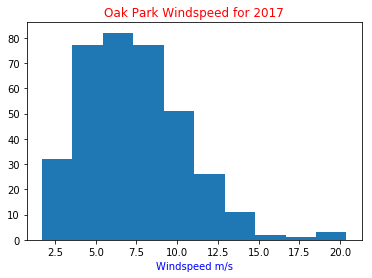

In [19]:
plt.hist(a);
plt.title('Oak Park Windspeed for 2017', color='r')
plt.xlabel('Windspeed m/s',color ='b')

Text(0.5,0,'Wind Direction degrees')

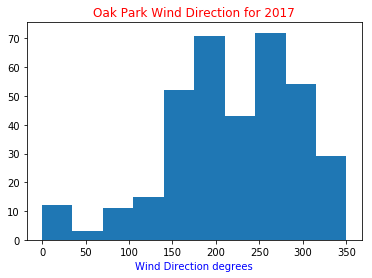

In [20]:
plt.hist(b);
plt.title('Oak Park Wind Direction for 2017', color='r')
plt.xlabel('Wind Direction degrees',color ='b')

Text(0.5,1.05,'Oakpark Windspeed and Direction for 2017')

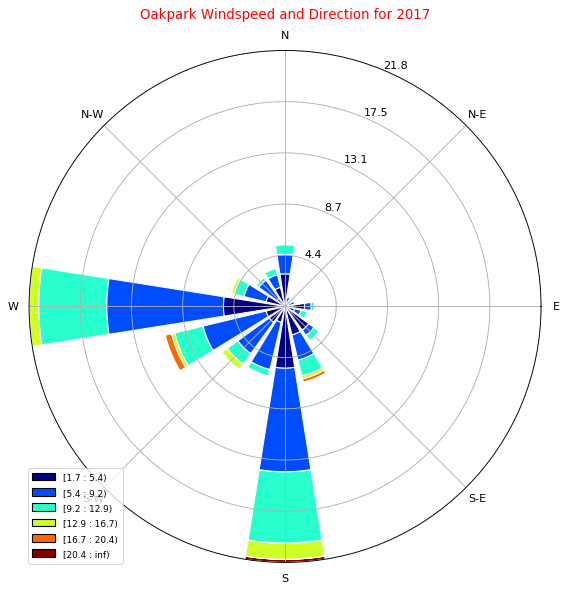

In [21]:
# Adapted from https://media.readthedocs.org/pdf/windrose/latest/windrose.pdf
bins_range = np.arange(1,6,1) # this sets the legend scale
ax = WindroseAxes.from_ax()
ax.bar(b,a, normed=True, opening=0.8, edgecolor='white')
ax.set_legend();
ax.set_title("Oakpark Windspeed and Direction for 2017", color='r')

Text(0.5,1.05,'Oakpark Windspeed and Direction for 2017')

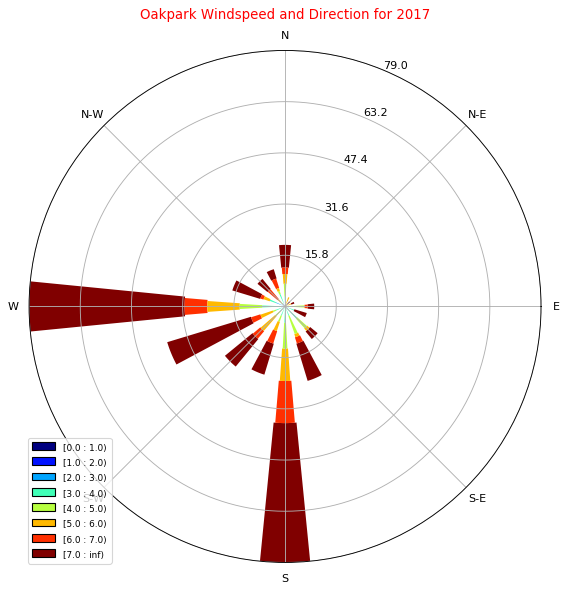

In [22]:
ax = WindroseAxes.from_ax()
ax.box(b, a, bins=np.arange(0, 8, 1))
ax.set_legend()
ax.set_title("Oakpark Windspeed and Direction for 2017", color='r')


### Simulated Wind Speed (WdSp) in m/s
Having read the following paper *"Analytical study of different probability distributions for wind speed related to power statistics"*<sup>[Ref](https://ieeexplore.ieee.org/document/5211970)</sup>, we elected to use a weibull distribution function in generating random varialbes for wind speed.

Text(0.5,1,'Simulated Windspeed Data')

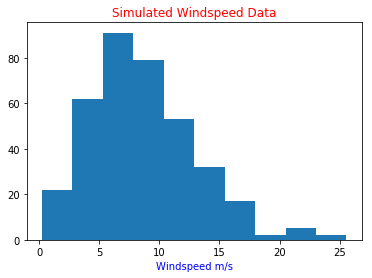

In [23]:
# Fake up some Wind Speed data
wdsp = np.random.weibull(2, 365) *10 # We inlcude a multiplication factor to give the range value we are seeking.
plt.hist(wdsp, bins =10);
plt.xlabel('Windspeed m/s', color='b')
plt.title('Simulated Windspeed Data', color='r')

Text(0.5,1,'Simulated Wind Direction Data')

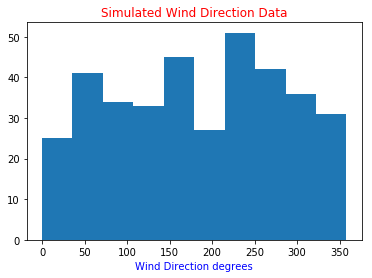

In [24]:
# Simulate Wind Direction
wddir = np.random.randint(0, 360, 365) # We haven't figured out how to stack the data in a particular sector e.g. south/southwest
plt.hist(wddir);
plt.xlabel('Wind Direction degrees', color='b')
plt.title('Simulated Wind Direction Data', color='r')

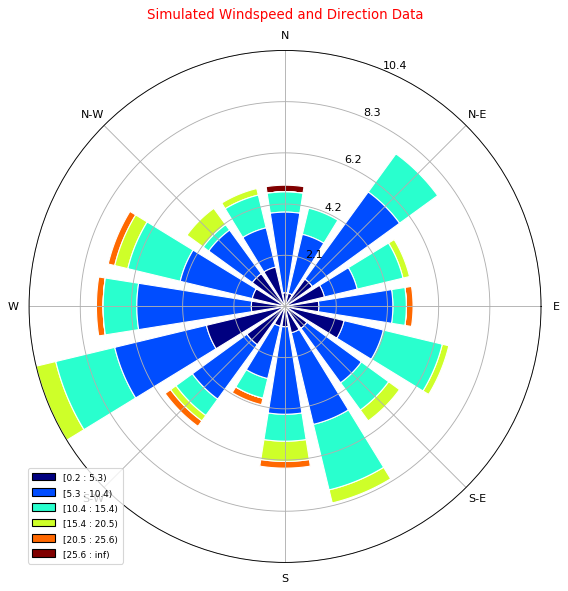

In [25]:
#Now let's plot some nicer graphics using the Windrose function in Matplotlib
# Adapted from https://media.readthedocs.org/pdf/windrose/latest/windrose.pdf
ax = WindroseAxes.from_ax()
ax.bar(wddir,wdsp, normed=True, opening=0.8, edgecolor='white')
ax.set_legend()
ax.set_title("Simulated Windspeed and Direction Data", color='r')
plt.show()

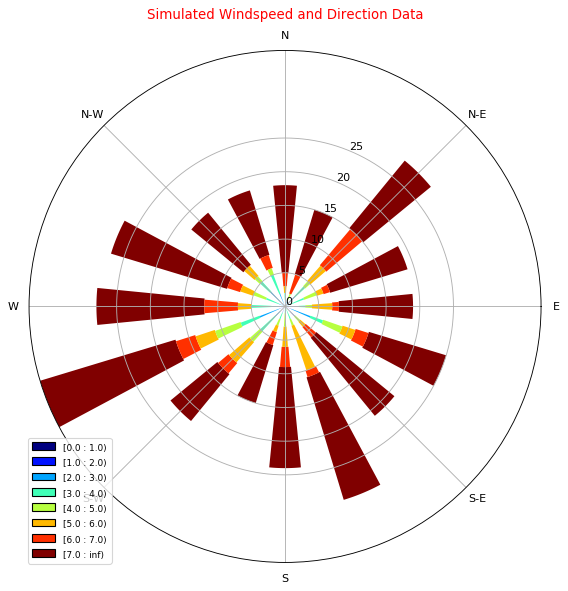

In [26]:
ax = WindroseAxes.from_ax()
ax.box(wddir,wdsp, bins=np.arange(0, 8, 1))
ax.set_legend()
ax.set_yticks(np.arange(0, 30, step=5))
ax.set_yticklabels(np.arange(0, 30, step=5))
ax.set_title("Simulated Windspeed and Direction Data", color='r')
plt.show()

### Rainfall
We looked at ......

In [27]:
c = df1['Rainfall']
c.mean()# Verify correct data selected using metric

2.0709944751381237

Text(0.5,0,'Rainfall in mm')

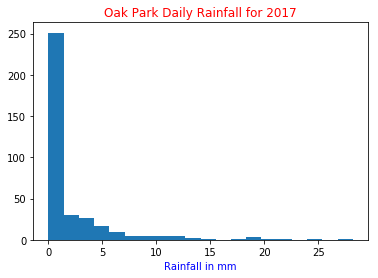

In [28]:
plt.hist(c, bins=20);
plt.title('Oak Park Daily Rainfall for 2017', color='r')
plt.xlabel('Rainfall in mm',color ='b')

In [29]:
# We need to figure out what is the best distribution function for this parameter.

In [30]:
# Assume Rainfall has a normal distribution - we have the values for 'mean' and 'std' from above, so let's plot.
FakeRain = np.random.normal(2.07, 4.0, 365)

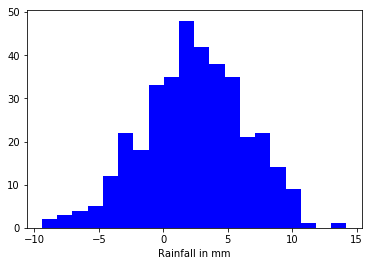

In [31]:
plt.hist(FakeRain,20, color ='b')
plt.xlabel('Rainfall in mm');

In [32]:
#Now let's look at the statistics of the number array (ref = https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.describe.html)
from scipy import stats
stats.describe(FakeRain)

DescribeResult(nobs=365, minmax=(-9.413228673416729, 14.215115331070166), mean=2.3720026672709738, variance=15.732344914603887, skewness=-0.16664271457575847, kurtosis=-0.12133120465980385)

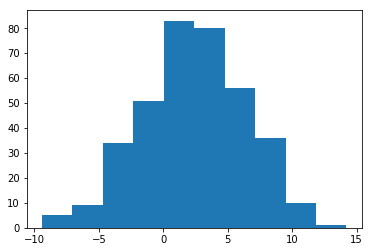

In [33]:
# So, we see that the 'normal' distribution has negative numbers, which is contrary to actual data, so we look at applying a variation of the 'normal' distribution.
# However we see that the rainfall distribution is returning negative numbers - so let's find a different distribution.
#Having read the paper on 'PDF of rainrate and estimation of rainfall' (as referenced in the footer), we will use the lognormal distribution function;

Rain = np.random.lognormal(2.07, 4.0, 365)
plt.hist(FakeRain);

In [34]:
# We see from the graphic that lognormal is not giving us the required result as it is returning exponential result.
#Having read through the various distribution options in the SciPy.org 'Random Sampling (numpy.random)' we note references in the Gumbel distribution to rainfall.
#The Gumbel (named for German mathematician Emil Julius Gumbel) was used very early in the hydrology literature, for modeling the occurrence of flood events. It is also used for modeling maximum wind speed and rainfall rates. It is a “fat-tailed” distribution - the probability of an event in the tail of the distribution is larger than if one used a Gaussian, hence the surprisingly frequent occurrence of 100-year floods.

#First however we need to determine the location of the 'mode' value for the Gumbel distribution.
#We do this by applying the function 
df1.iloc[:,0].mode()

0    0.0
dtype: float64

In [35]:
#We know the location fo the mode and the shape, and the days per year
FakeRain1 = np.random.gumbel(0.0,2,365)

Text(0.5,1,'Simulated Rainfall Data')

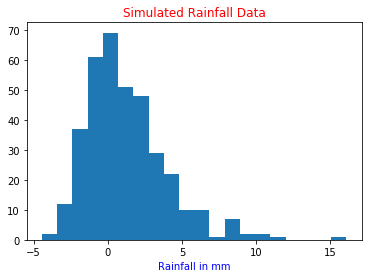

In [36]:
# Let's increase the number of bins to give us a more accurate reflection of the sampling fequency;
plt.hist(FakeRain1, 20)
plt.xlabel('Rainfall in mm', color='b')
plt.title('Simulated Rainfall Data', color='r')

In [37]:
from scipy import stats
stats.describe(FakeRain1)

DescribeResult(nobs=365, minmax=(-4.437078981754197, 16.092362231131904), mean=1.2496390870293603, variance=7.593623222610629, skewness=1.2797010130521869, kurtosis=2.8535083128170298)

In [38]:
# Again we have negative numbers from a distribution from which we require non-negative numbers.
# Let's look at some non-negative type distributions.

In [39]:
FakeRain2 = np.random.wald(2.07,28.2,365) 
stats.describe(FakeRain2)

DescribeResult(nobs=365, minmax=(0.9970206950944664, 3.8286153913059637), mean=2.0453558666974345, variance=0.2634189731518449, skewness=0.572635952491148, kurtosis=0.18649852908488818)

In [40]:
# We now see that the 'Wald' distribution function gives us non-negative numbers with a correct 'mean' but the min/max values are incorrect.


### Soil Temperature in deg Celsius

In [41]:
#Let's establish was the baseline look like;
d = df1['Soil Temp']

In [42]:
d.mean() #quick check to see if the data selection is correct

11.473392265193366

Text(0.5,1,'Oakpark Soil Temperature for 2017')

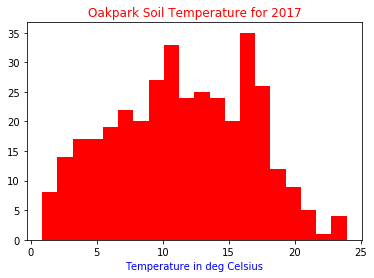

In [43]:
plt.hist(d, bins=20, color='r');
plt.xlabel('Temperature in deg Celsius', color='b')
plt.title('Oakpark Soil Temperature for 2017', color='r')

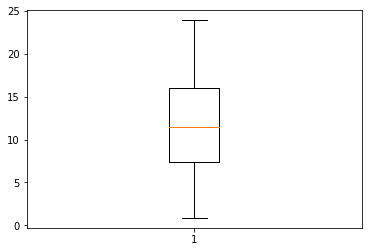

In [44]:
plt.boxplot(d);

In [45]:
#Having read the paper on "Matching Temperature Data to a Normal Distribution" we will now deploy a random normal distribution
#generate comparable data to the target dataset.

In [46]:
Fake_Temp = np.random.normal(11.47, 5.19, 362)

In [47]:
Fake_Temp.max()

28.119260513702606

In [48]:
Fake_Temp.min()

-4.509972555301797

In [49]:
Fake_Temp.mean()

11.447431118586087

Text(0.5,1,'Simulated Soil Temperature')

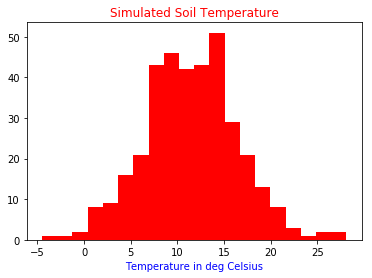

In [50]:
count, bins, ignored = plt.hist(Fake_Temp,20, color='r')
plt.xlabel('Temperature in deg Celsius', color='b')
plt.title('Simulated Soil Temperature', color='r')

In [51]:
stats.describe(Fake_Temp)

DescribeResult(nobs=362, minmax=(-4.509972555301797, 28.119260513702606), mean=11.447431118586087, variance=25.18367291163453, skewness=0.07365725355607966, kurtosis=0.388687446222141)

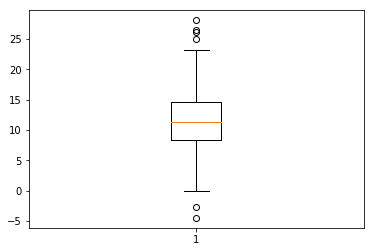

In [52]:
plt.boxplot(Fake_Temp);

### Solar Radiation

In [53]:
e = df1['Solar Radiation']

In [54]:
e.mean() #just checking!

946.9558011049724

Text(0.5,1,'Oakpark Solar Radiation for 2017')

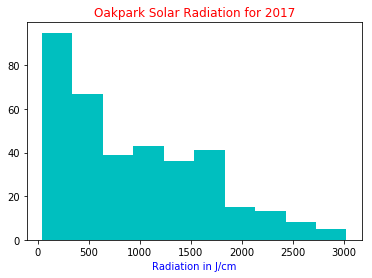

In [55]:
plt.hist(e, color='c');
plt.xlabel('Radiation in J/cm', color='b')
plt.title('Oakpark Solar Radiation for 2017', color='r')

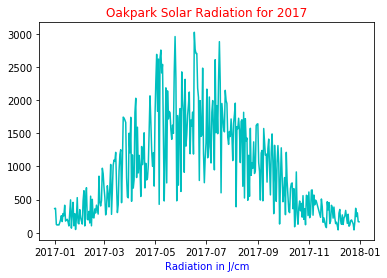

In [56]:
plt.plot(e,color='c')
plt.xlabel('Radiation in J/cm', color='b')
plt.title('Oakpark Solar Radiation for 2017', color='r');

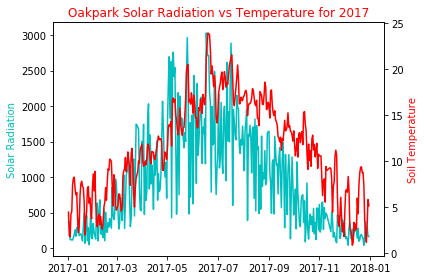

In [70]:
# To plot 2 datasets with different ranges on the same x axis we Ref https://matplotlib.org/examples/api/two_scales.html
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.plot(e, color ='c')
ax2.plot(d, color = 'r')
ax1.set_ylabel('Solar Radiation', color='c')
ax2.set_ylabel('Soil Temperature', color='r')
plt.xlabel('Date', color='b')
plt.title('Oakpark Solar Radiation vs Temperature for 2017', color='r');
fig.tight_layout()
plt.show()

In [58]:
Fake_Solar = np.random.gamma(1,500,365)

Text(0.5,1,'Simulated Solar Radiation Data')

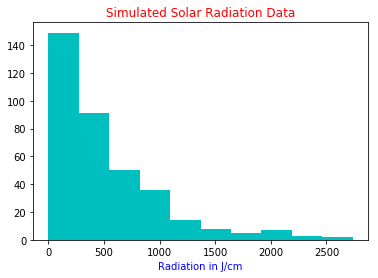

In [59]:
plt.hist(Fake_Solar, color='c')
plt.xlabel('Radiation in J/cm', color='b')
plt.title('Simulated Solar Radiation Data', color='r')

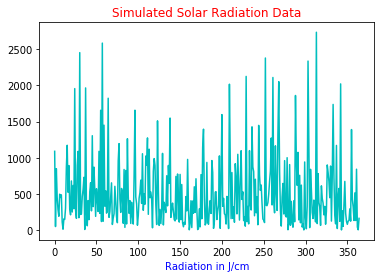

In [60]:
plt.plot(Fake_Solar, color='c')
plt.xlabel('Radiation in J/cm', color='b')
plt.title('Simulated Solar Radiation Data', color='r');

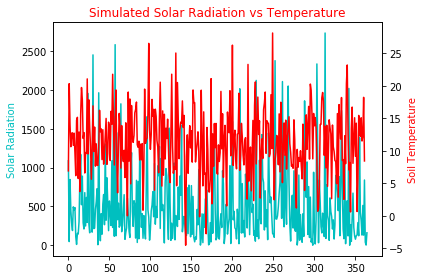

In [72]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.plot(Fake_Solar, color ='c')
ax2.plot(Fake_Temp, color = 'r')
ax1.set_ylabel('Solar Radiation', color='c')
ax2.set_ylabel('Soil Temperature', color='r')
plt.xlabel('Date', color='b')
plt.title('Simulated Solar Radiation vs Temperature', color='r');
fig.tight_layout()
plt.show()

[The Probability Density Function of Rain Rate and the Estimation of Rainfall by Area Integrals](https://journals.ametsoc.org/doi/10.1175/1520-0450%281994%29033%3C1255%3ATPDFOR%3E2.0.CO%3B2)

[SIMULATING MAXIMUM AND MINIMUM DAILY TEMPERATURE
WITH THE NORMAL DISTRIBUTION](https://naldc.nal.usda.gov/download/27264/PDF)

[Matching Temperature Data to a Normal Distribution](http://demonstrations.wolfram.com/MatchingTemperatureDataToANormalDistribution/)



[Statistical Properties of the Atmospheric Pressure Field over the Artic Ocean](https://journals.ametsoc.org/doi/pdf/10.1175/1520-0469%281982%29039%3C2229%3ASPOTAP%3E2.0.CO%3B2)

[Probability distributions for offshore wind speeds](https://engineering.tufts.edu/cee/people/vogel/documents/probabilityDistributionsOffshoreWindSpeeds.pdf)

[Analytical study of different probability distributions for wind speed related to power statistics](https://ieeexplore.ieee.org/document/5211970)